# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
# import API Key from config file
from api_keys import api_key

# OpenWeatherMap API Key
#api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
 # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Djambala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=djambala
Processing Record 2 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=rikitea
Processing Record 3 | Wattegama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=wattegama
Processing Record 4 | Sao Felix do Xingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=sao felix do xingu
Processing Record 5 | Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=atuona
Processing Record 6 | Esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=esperance
Processing Record 7 | Leninskoye
http://api.openweathermap.org/data

Processing Record 56 | Mersing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=mersing
Processing Record 57 | Kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=kruisfontein
Processing Record 58 | Zhangye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=zhangye
Processing Record 59 | Axim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=axim
Processing Record 60 | Khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=khatanga
Processing Record 61 | Santa Maria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=santa maria
Processing Record 62 | Nabire
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=n

Processing Record 112 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=port alfred
Processing Record 113 | Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=ponta do sol
Processing Record 114 | Kuching
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=kuching
City not found. Skipping...
Processing Record 115 | Diamantino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=diamantino
City not found. Skipping...
Processing Record 116 | Mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=mehamn
Processing Record 117 | Salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=salalah
Processing Record 118 | Atar
http://api.openweathermap.org/data/

Processing Record 166 | Ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=ahipara
Processing Record 167 | Katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=katsuura
Processing Record 168 | Eirunepe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=eirunepe
Processing Record 169 | Kibara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=kibara
Processing Record 170 | Ibra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=ibra
Processing Record 171 | Saint-Ambroise
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=saint-ambroise
Processing Record 172 | Vila Velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d365

Processing Record 222 | Nuuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=nuuk
Processing Record 223 | Silver City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=silver city
City not found. Skipping...
Processing Record 224 | Christchurch
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=christchurch
Processing Record 225 | Nyagan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=nyagan
Processing Record 226 | Badulla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=badulla
Processing Record 227 | Rancho Palos Verdes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=rancho palos verdes
Processing Record 228 | Fukue
http://api.openweathermap.org/data/2.5/weather?uni

Processing Record 277 | Hailey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=hailey
Processing Record 278 | Nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=nemuro
Processing Record 279 | Geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=geraldton
Processing Record 280 | Sangar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=sangar
City not found. Skipping...
Processing Record 281 | Baykit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=baykit
Processing Record 282 | Dwarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=dwarka
Processing Record 283 | Bambanglipuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8

City not found. Skipping...
Processing Record 333 | Mach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=mach
Processing Record 334 | Santiago del Estero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=santiago del estero
Processing Record 335 | Aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=aklavik
Processing Record 336 | Ruyigi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=ruyigi
Processing Record 337 | Koping
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=koping
Processing Record 338 | Iranshahr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=iranshahr
Processing Record 339 | Norton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Processing Record 388 | Moscow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=moscow
Processing Record 389 | Gizo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=gizo
City not found. Skipping...
Processing Record 390 | Kandrian
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=kandrian
Processing Record 391 | Coracao de Jesus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=coracao de jesus
Processing Record 392 | Son La
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=son la
Processing Record 393 | Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=severo-kurilsk
City not found. Skipping...
Processing Record 394 | Port Macquarie
http://api.openweatherm

Processing Record 444 | Balkhash
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=balkhash
City not found. Skipping...
Processing Record 445 | Bhinga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=bhinga
Processing Record 446 | Yerbogachen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=yerbogachen
Processing Record 447 | Tacuarembo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=tacuarembo
Processing Record 448 | Doctor Arroyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=doctor arroyo
Processing Record 449 | Sambava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=sambava
Processing Record 450 | Emerald
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing Record 499 | Lexington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=lexington
Processing Record 500 | Rosetta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=rosetta
Processing Record 501 | Agadez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=agadez
Processing Record 502 | Palembang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=palembang
Processing Record 503 | Port Moresby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=port moresby
Processing Record 504 | Bozeman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d3654db&q=bozeman
Processing Record 505 | Whyalla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ac0fce201f8c8cd3fe09c708d

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          543
Cloudiness    543
Country       543
Date          543
Humidity      543
Lat           543
Lng           543
Max Temp      543
Wind Speed    543
dtype: int64

In [33]:
# Save data frame to CSV
weather_data.to_csv('./weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Djambala,21,CG,1559778080,70,-2.55,14.76,72.05,5.28
1,Rikitea,100,PF,1559778081,84,-23.12,-134.97,76.91,13.04
2,Wattegama,98,LK,1559778082,86,7.35,80.68,73.49,2.98
3,Sao Felix do Xingu,17,BR,1559778083,78,-6.64,-51.99,73.67,3.33
4,Atuona,26,PF,1559778084,76,-9.80,-139.03,82.49,18.68


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

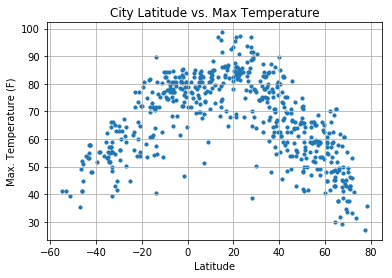

In [35]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

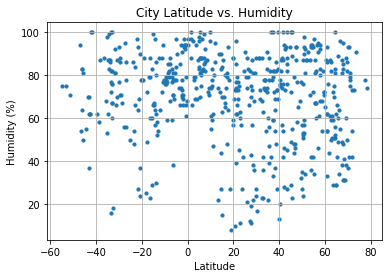

In [37]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

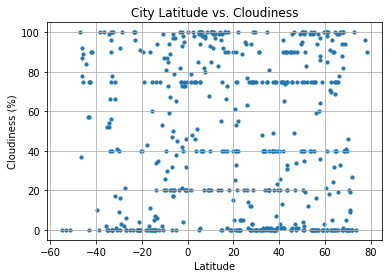

In [38]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

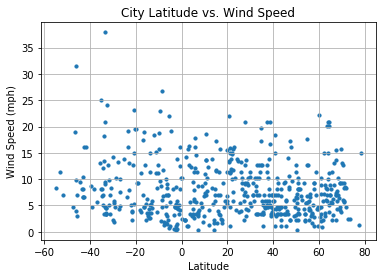

In [44]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

# Observable Trends
Trend 1 - Temperature vs Latitude Plot shows that the temperatures are higher the closer they are to the equator (latitude range of -20 to 20)

Trend 2 - City Latitude vs Windspeed Plot shows that Windspeeds are somewhat indifferent to Latitudes, but it is important to note that highest wind speed outliers all occur at latitudes furthest from the equator.

Trend 3 - Based on the data, it seems as though cloudiness and humidity are relatively consistent across all latitudes. Further analysis to include an additional variable may reveal further insights into those relationships
